<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Partial-Dependent-Plot" data-toc-modified-id="Partial-Dependent-Plot-1">Partial Dependent Plot</a></span></li><li><span><a href="#Idea" data-toc-modified-id="Idea-2">Idea</a></span></li><li><span><a href="#Math" data-toc-modified-id="Math-3">Math</a></span></li><li><span><a href="#Pros" data-toc-modified-id="Pros-4">Pros</a></span></li><li><span><a href="#Cons" data-toc-modified-id="Cons-5">Cons</a></span></li><li><span><a href="#Usage" data-toc-modified-id="Usage-6">Usage</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-7">Reference</a></span></li><li><span><a href="#Demo" data-toc-modified-id="Demo-8">Demo</a></span></li><li><span><a href="#End" data-toc-modified-id="End-9">End</a></span></li></ul></div>

# Partial Dependent Plot

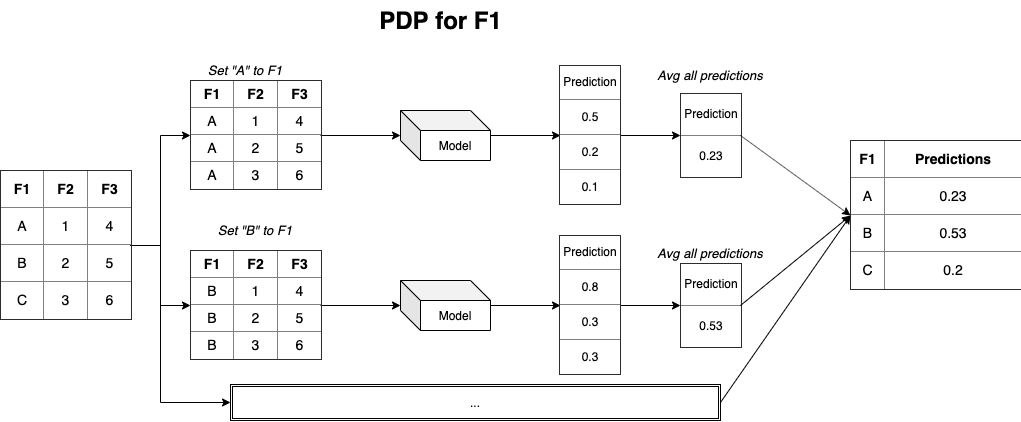

> marginal effect one or two features have on the predicted.

# Idea

Dataset X has 3 features: f1, f2 and f3. Question: if I increase f1, what will prediction look like in general?

To find Partial Dependence of prediction on f1:

- Fix f2 and f3 values in X.
- Set f1 to a particular value -> Make Prediction -> Take average prediction.
- Do again for other values.
- Plot Prediction changes vs. f1 values.

# Math

$$
\hat{f}_{x_S}(x_S)=E_{x_C}\left[\hat{f}(x_S,x_C)\right]=\int\hat{f}(x_S,x_C)d\mathbb{P}(x_C)
$$

- $ x_S $: Feature in set $ S $ to check. Only 1 or 2.
- $ x_C $: Other features, fixed, in set $ C $.
- $ \hat{f} $: ML model, depends on values of $ x_S $.
- Partial Dependence is the expected predictions of $ \hat{f} $ given various values in ($ x_S $ combines $ x_C $).
- Another saying: Prediction $ \hat{f} $ weighted sum by probability $ P(x_C) $ (aka: maginalize over distirbution in set $C$ ).

# Pros

- Intuitive: Average prediction of we force all data points of feature f1 to a value.
- In Uncorrelated case, interpretation is clear.
- Easy to implement.
- Has Causal Interpretation: We intervene feature and measure how prediction changes.

# Cons

- Can only work with maximum 2 features.
- Assumption of no co-correlation. Fix: Accumulated Local Effect Plots and Feature Clustering-Removing technique.
- Show average prediction is misleading, because some domain values has very few data points. Fix: Show data points! (`shap` library).
- Cannot show Heterogeneous effect. Fix: Individual Conditional Expectation curves.

# Usage

- Blackbox model and Glassbox model.
- Pick most important features and do PDP.
- Consider Co-Correlation. Need to check Feature Clustering chart.

# Reference

- [Maginalization in probability](https://towardsdatascience.com/probability-concepts-explained-marginalisation-2296846344fc).

# Demo

In [1]:
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor

# load JS visualization code to notebook
shap.initjs()

In [2]:
X, y = shap.datasets.boston()
model = RandomForestRegressor(max_depth=3).fit(X, y)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

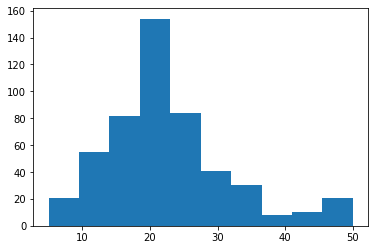

In [3]:
plt.hist(y)

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


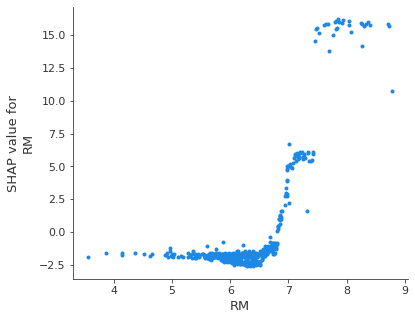

In [5]:
# Changes in prediction house price as RM changes.
# RM < 7: negative prediction an amount ~ -1
# RM from 7 to 8 increases prediction from 2.2 to 15.
shap.dependence_plot("RM", shap_values, X, interaction_index=None)

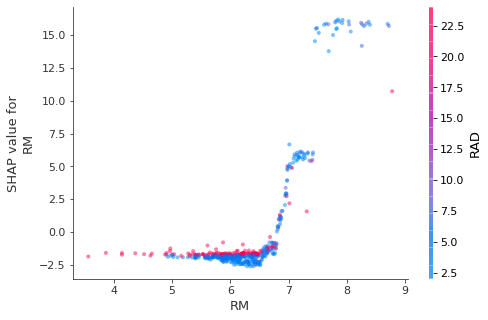

In [6]:
# Changes in prediction house price as RM changes.
# And how RM interacts with approximated strongest interation feature RAD.
shap.dependence_plot("RM", shap_values, X, interaction_index="auto", alpha=0.5)

# End